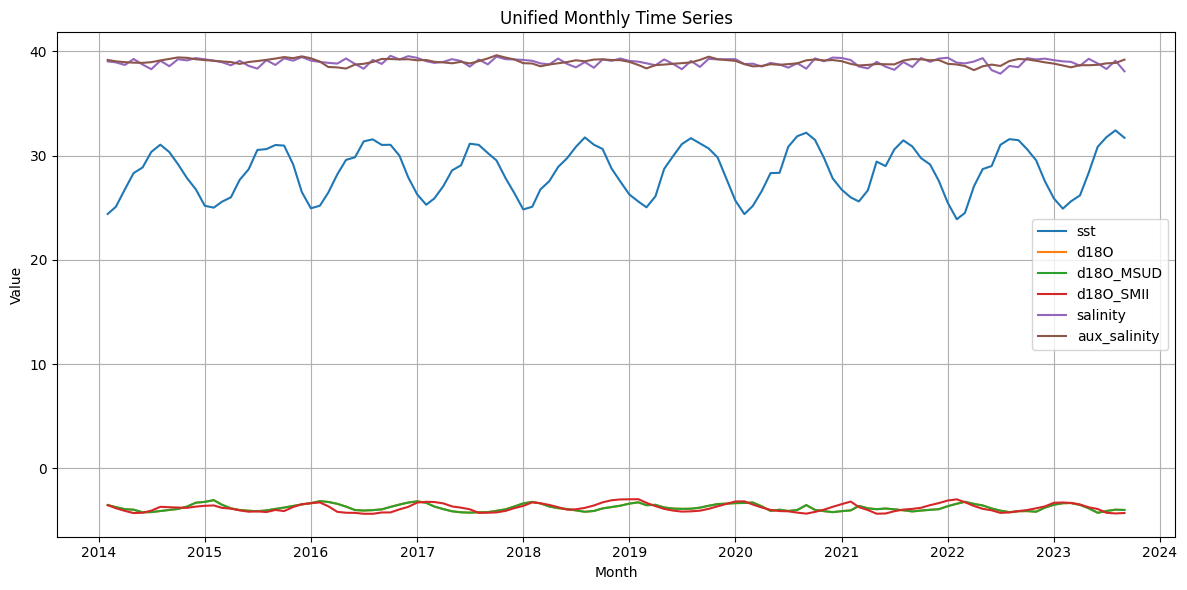

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the unified dataset
df = pd.read_csv("unified_datasets.csv")
df["month"] = pd.to_datetime(df["month"].astype(str))  # convert Period to datetime for plotting
df = df.dropna()

# Plot each column
plt.figure(figsize=(12, 6))
for col in df.columns:
    if col != "month":
        plt.plot(df["month"], df[col], label=col)

plt.title("Unified Monthly Time Series")
plt.xlabel("Month")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

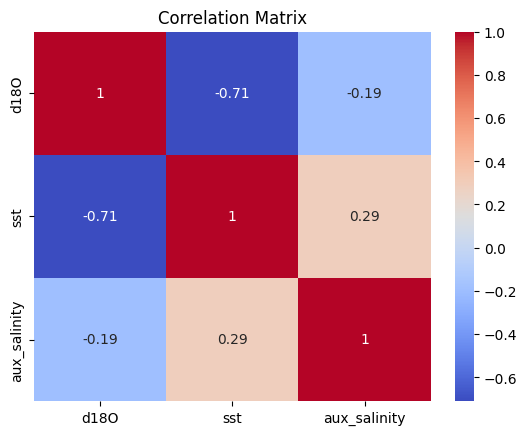

In [2]:
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
import seaborn as sns

# Auxiliary Salinity Data
correlation_matrix = df[['d18O', 'sst', 'aux_salinity']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

                            OLS Regression Results                            
Dep. Variable:                   d18O   R-squared:                       0.504
Model:                            OLS   Adj. R-squared:                  0.495
Method:                 Least Squares   F-statistic:                     56.92
Date:                Mon, 14 Jul 2025   Prob (F-statistic):           8.79e-18
Time:                        20:43:44   Log-Likelihood:                 9.5001
No. Observations:                 115   AIC:                            -13.00
Df Residuals:                     112   BIC:                            -4.765
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.7810      0.021   -179.610      0.0

/var/folders/8v/z7_lynrn24bbpwy6p36j3cwc0000gn/T/ipykernel_25044/983719342.py:15: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axs[0].legend()
/var/folders/8v/z7_lynrn24bbpwy6p36j3cwc0000gn/T/ipykernel_25044/983719342.py:22: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axs[1].legend()


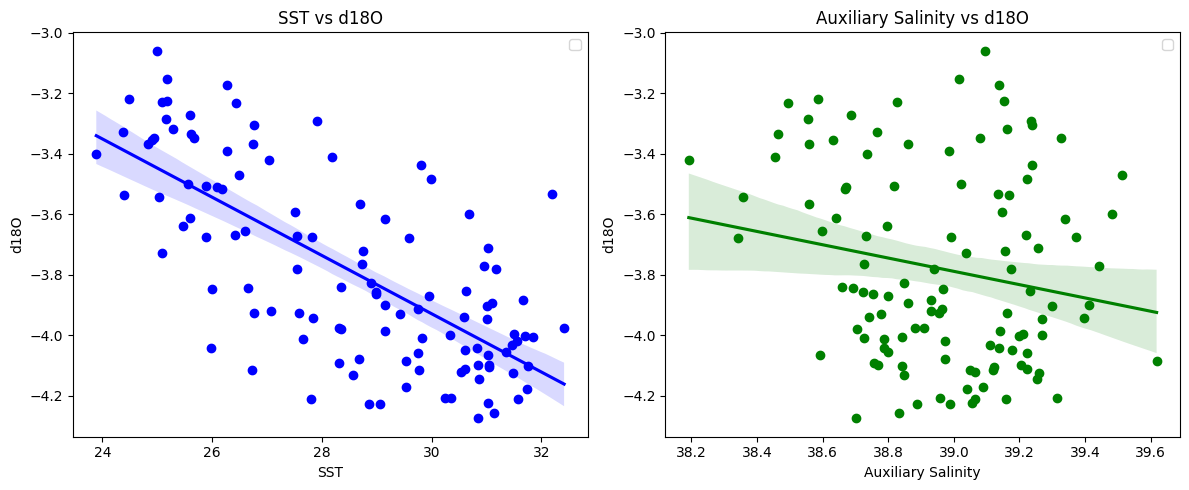

In [3]:
# Multiple Linear Regression
X = df[['sst', 'aux_salinity']]
y = df['d18O']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = sm.add_constant(X_scaled)
model = sm.OLS(y, X_scaled).fit()
print(model.summary())

# Visualize
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

axs[0].scatter(df['sst'], df['d18O'], color='blue')
sns.regplot(x='sst', y='d18O', data=df, scatter=False, ax=axs[0], color='blue', line_kws={'label': 'Best Fit Line'})
axs[0].legend()
axs[0].set_title("SST vs d18O")
axs[0].set_xlabel("SST")
axs[0].set_ylabel("d18O")

axs[1].scatter(df['aux_salinity'], df['d18O'], color='green')
sns.regplot(x='aux_salinity', y='d18O', data=df, scatter=False, ax=axs[1], color='green', line_kws={'label': 'Best Fit Line'})
axs[1].legend()
axs[1].set_title("Auxiliary Salinity vs d18O")
axs[1].set_xlabel("Auxiliary Salinity")
axs[1].set_ylabel("d18O")

plt.tight_layout()
plt.show()

# Results

**Statistically significant** negative correlation between SST and d18O.
- Pearson correlation of $-0.71$.
- Slope coefficient of $-0.2178$.
- $p < 0.001$.

Statistically *in*significant negative correlation between SSS (aux) and d18O.
- Pearson correlation of $-0.19$.
- Slope coefficient of $0.0053$.
- $p = 0.810 > 0.05$.


In [4]:
# Create lagged features for aux salinity
dataframes = {}
for i in range(-4, 5):
    if i != 0:
        copy = df.copy()
        copy['aux_salinity'] = df['aux_salinity'].shift(-i).fillna(method='ffill')
        copy = copy.dropna(subset=['d18O', 'sst', 'aux_salinity'])
        dataframes[i] = copy

/var/folders/8v/z7_lynrn24bbpwy6p36j3cwc0000gn/T/ipykernel_25044/41875949.py:6: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  copy['aux_salinity'] = df['aux_salinity'].shift(-i).fillna(method='ffill')


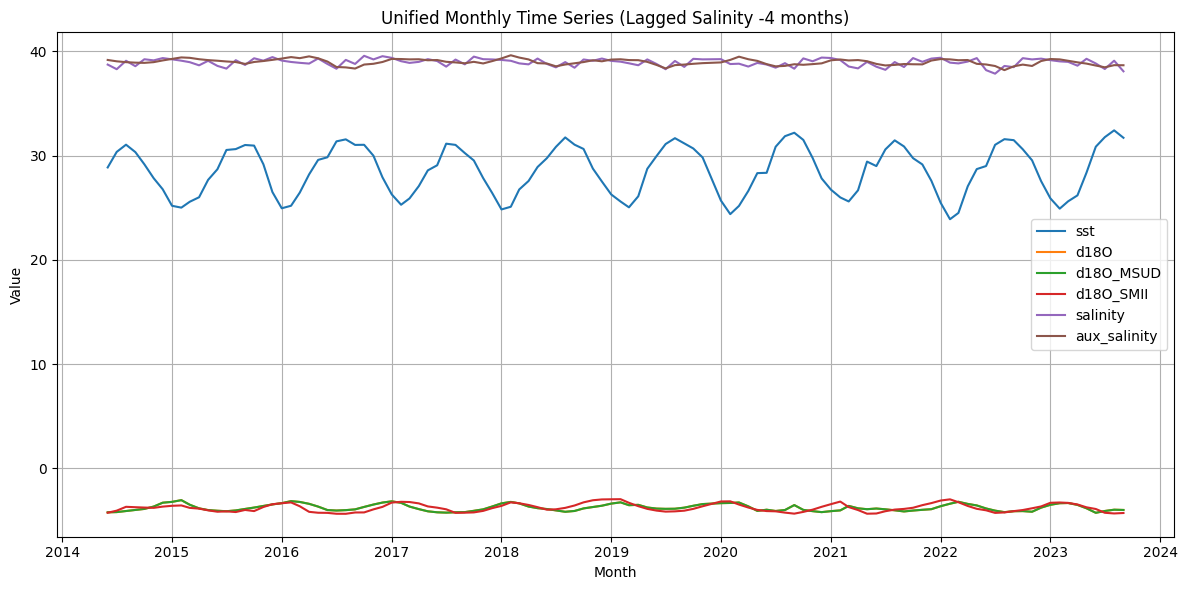

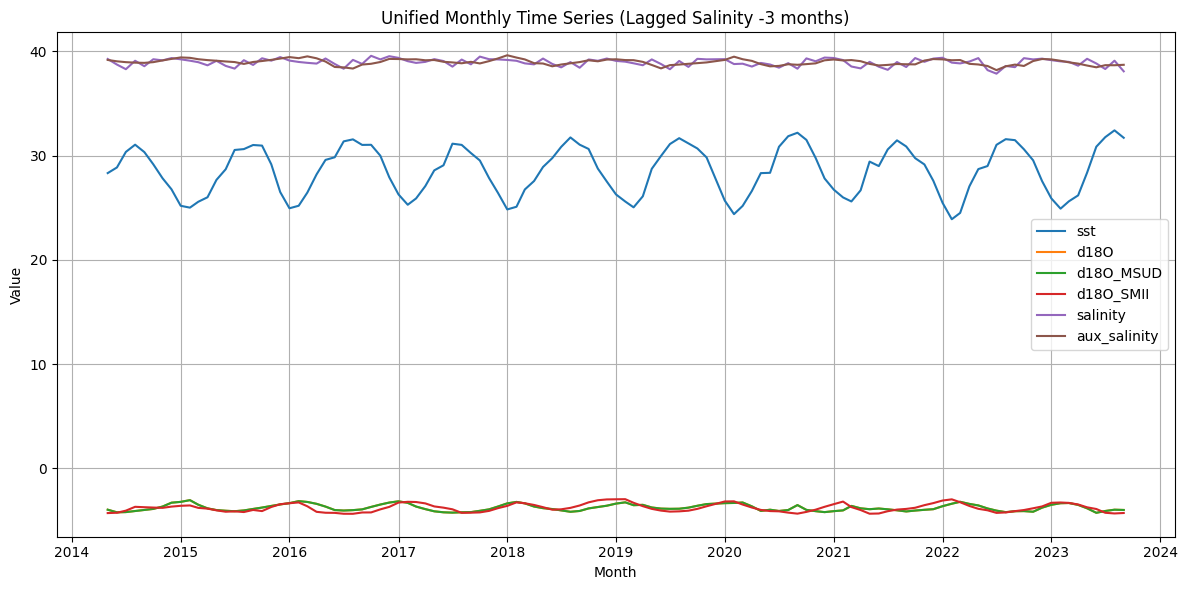

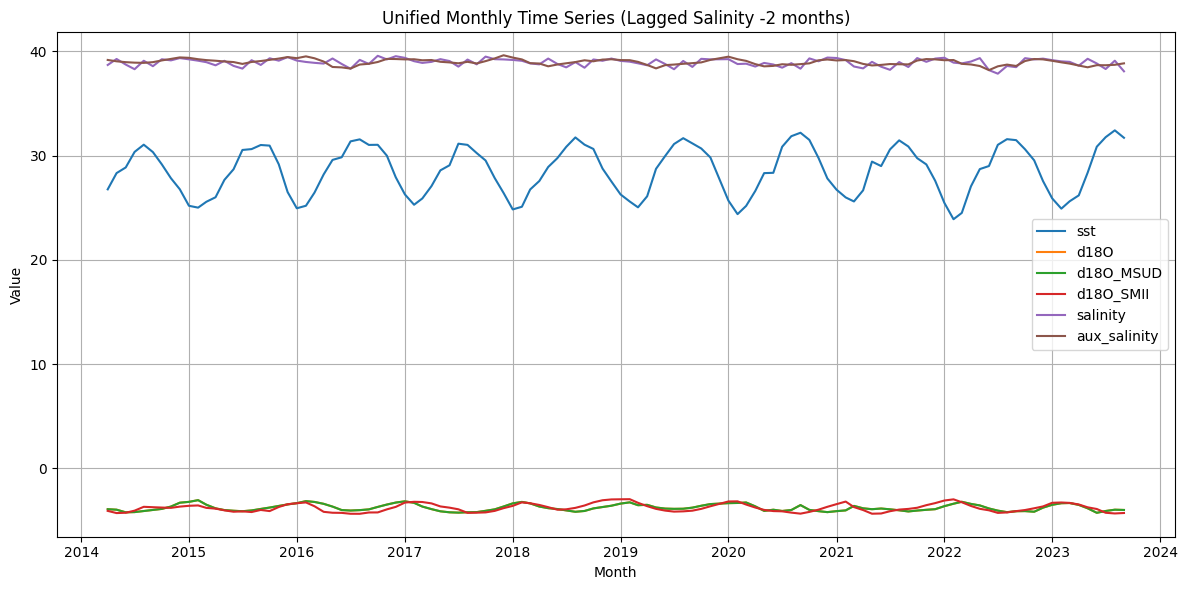

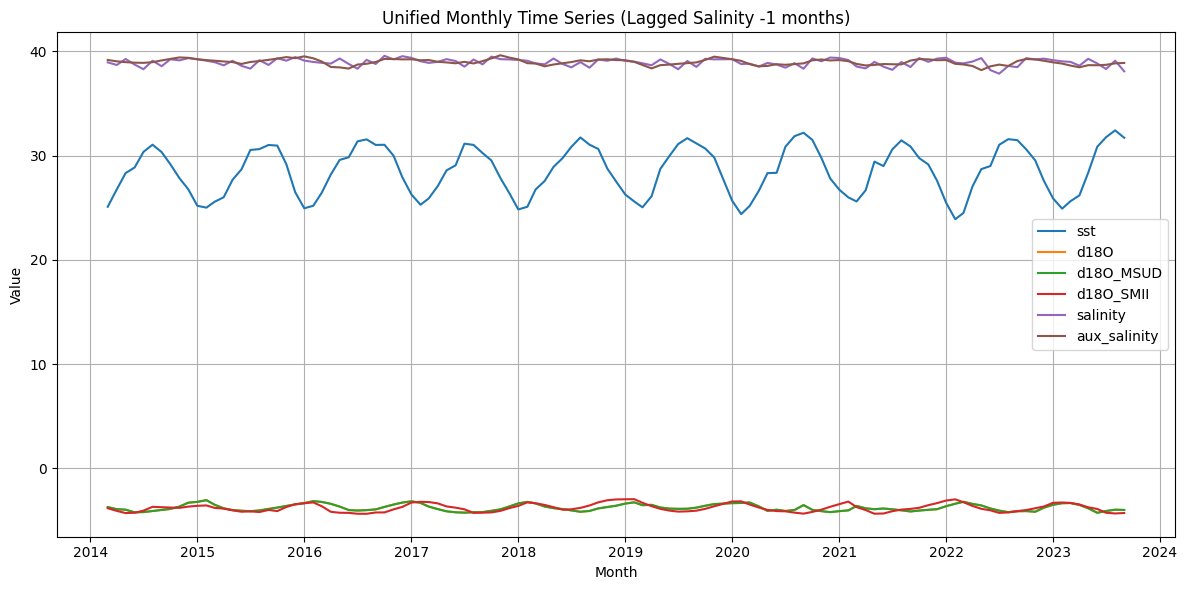

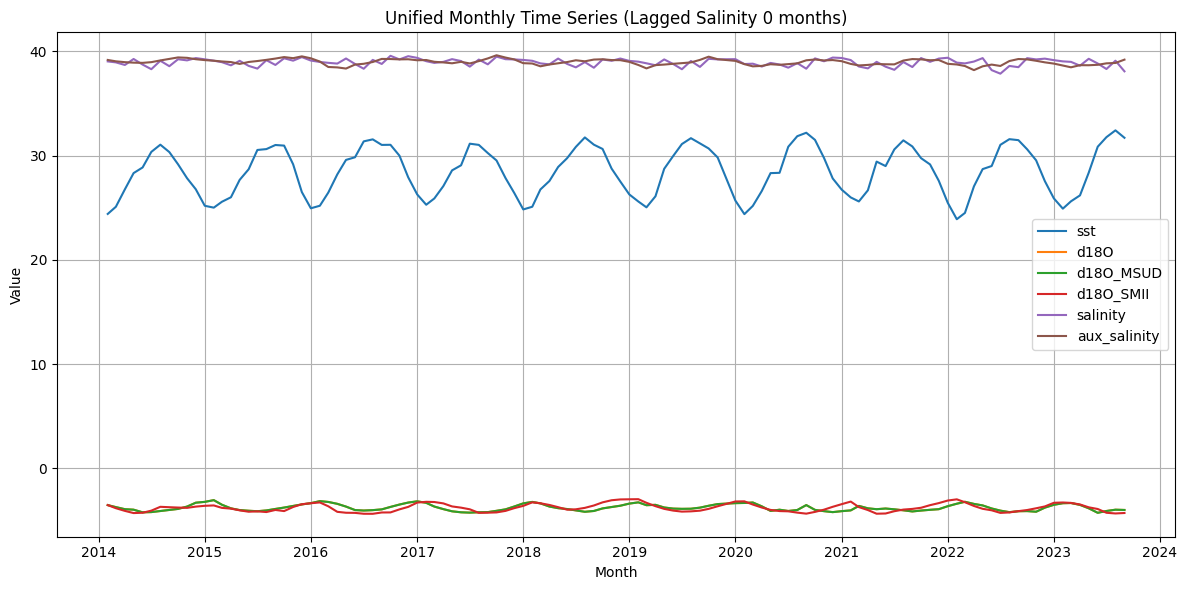

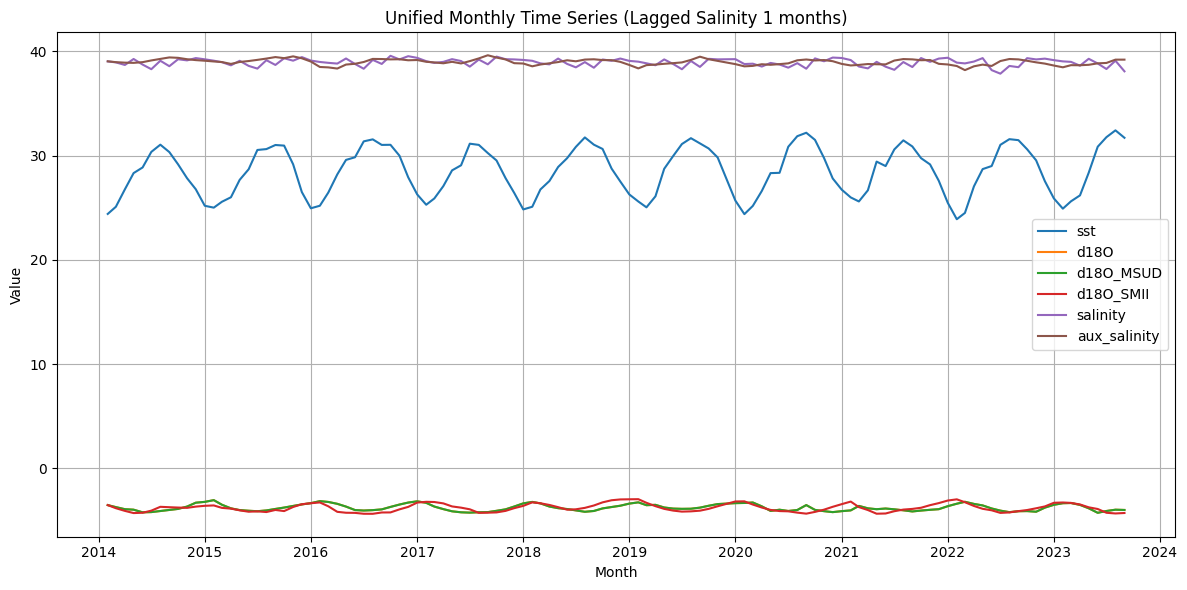

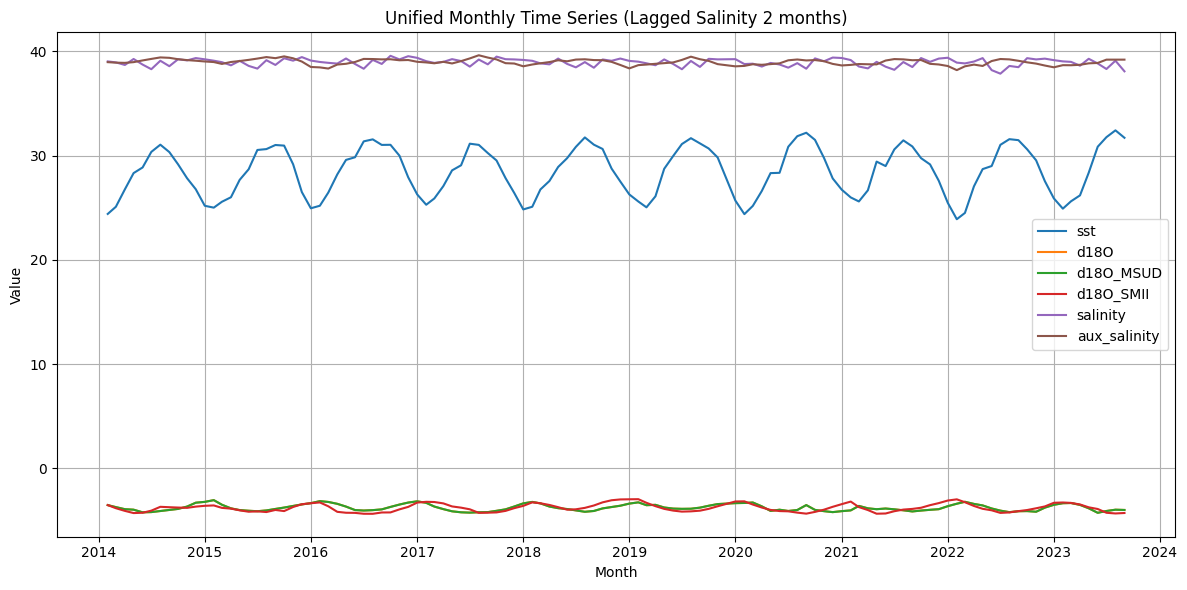

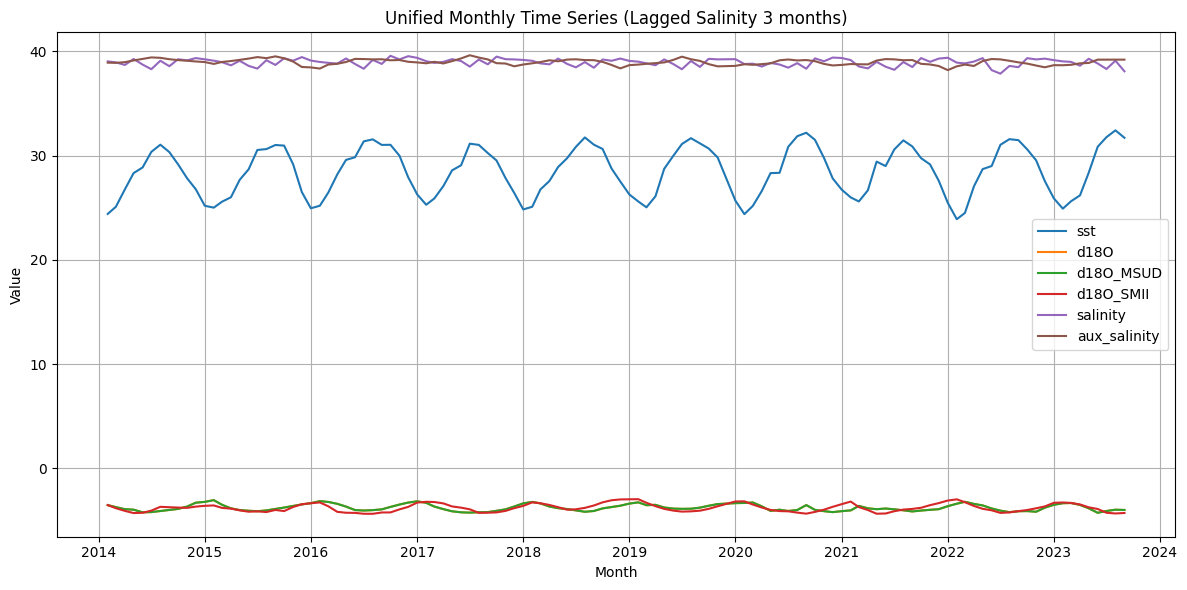

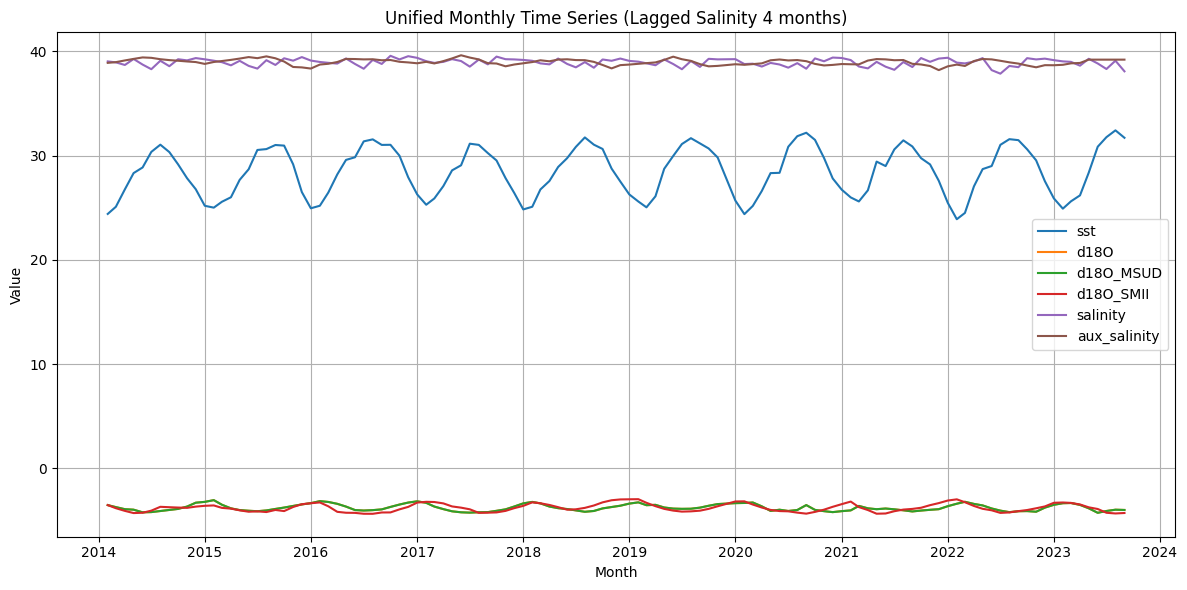

In [5]:
# Graph the lagged features on the same plot
for i in range(-4, 5):
    if i == 0:
        lagged_df = df
    else:
        lagged_df = dataframes[i]
    plt.figure(figsize=(12, 6))
    for col in df.columns:
        if col != "month":
            plt.plot(lagged_df["month"], lagged_df[col], label=col)
    
    plt.title("Unified Monthly Time Series (Lagged Salinity " + str(i) + " months)")
    plt.xlabel("Month")
    plt.ylabel("Value")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
plt.show()

----------------------------------------------------------------------------------------------------


                            OLS Regression Results                            
Dep. Variable:                   d18O   R-squared:                       0.524
Model:                            OLS   Adj. R-squared:                  0.516
Method:                 Least Squares   F-statistic:                     59.53
Date:                Mon, 14 Jul 2025   Prob (F-statistic):           3.75e-18
Time:                        20:45:33   Log-Likelihood:                 10.116
No. Observations:                 111   AIC:                            -14.23
Df Residuals:                     108   BIC:                            -6.104
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.7806      0.021   -177.866      0.0

/var/folders/8v/z7_lynrn24bbpwy6p36j3cwc0000gn/T/ipykernel_25044/4230309644.py:24: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axs[0].legend()


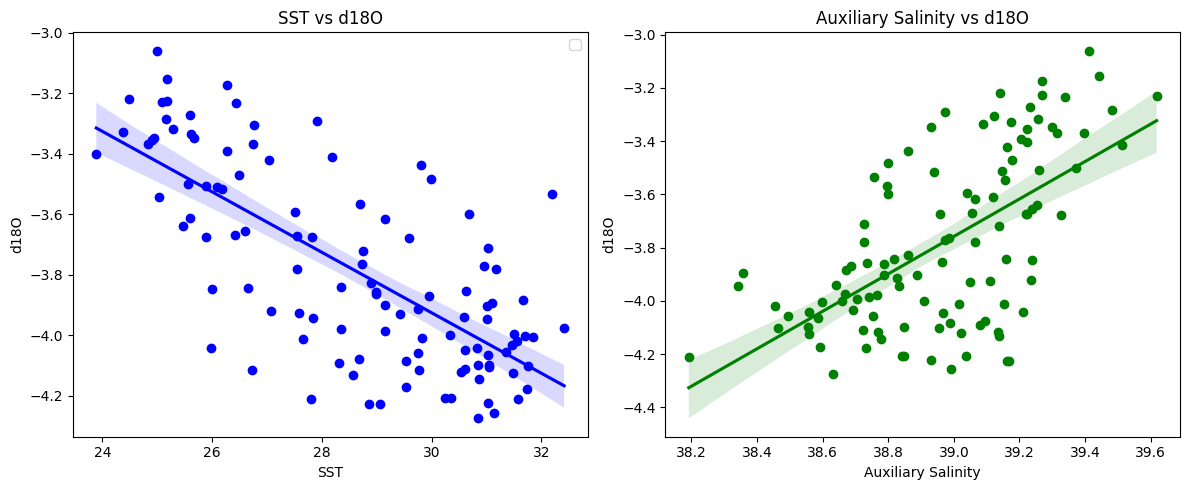

----------------------------------------------------------------------------------------------------


                            OLS Regression Results                            
Dep. Variable:                   d18O   R-squared:                       0.527
Model:                            OLS   Adj. R-squared:                  0.518
Method:                 Least Squares   F-statistic:                     60.75
Date:                Mon, 14 Jul 2025   Prob (F-statistic):           1.88e-18
Time:                        20:45:33   Log-Likelihood:                 10.854
No. Observations:                 112   AIC:                            -15.71
Df Residuals:                     109   BIC:                            -7.553
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.7824      0.021   -179.805      0.0

/var/folders/8v/z7_lynrn24bbpwy6p36j3cwc0000gn/T/ipykernel_25044/4230309644.py:24: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axs[0].legend()


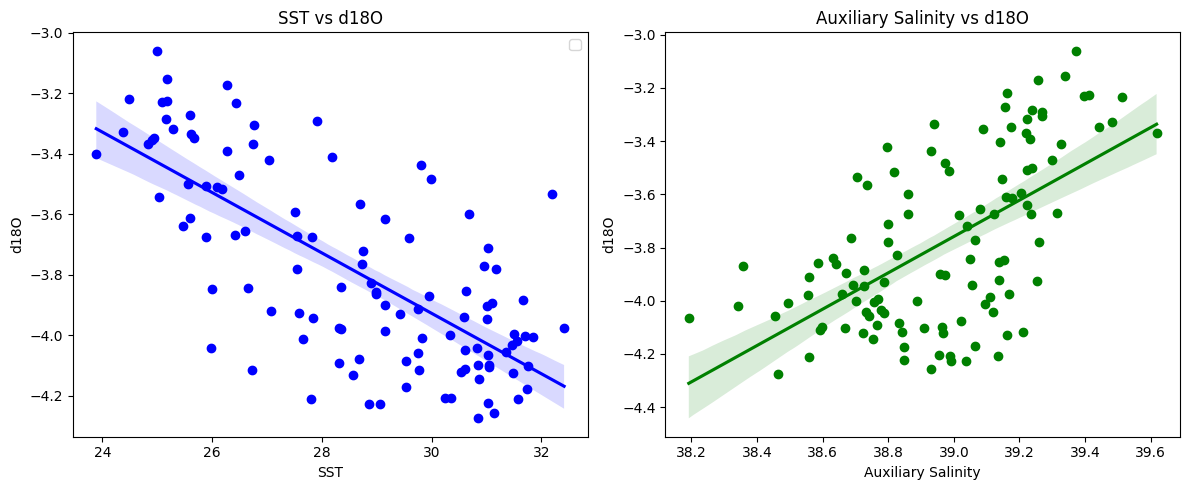

----------------------------------------------------------------------------------------------------


                            OLS Regression Results                            
Dep. Variable:                   d18O   R-squared:                       0.515
Model:                            OLS   Adj. R-squared:                  0.506
Method:                 Least Squares   F-statistic:                     58.29
Date:                Mon, 14 Jul 2025   Prob (F-statistic):           5.48e-18
Time:                        20:45:33   Log-Likelihood:                 9.8658
No. Observations:                 113   AIC:                            -13.73
Df Residuals:                     110   BIC:                            -5.549
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.7836      0.021   -178.962      0.0

/var/folders/8v/z7_lynrn24bbpwy6p36j3cwc0000gn/T/ipykernel_25044/4230309644.py:24: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axs[0].legend()


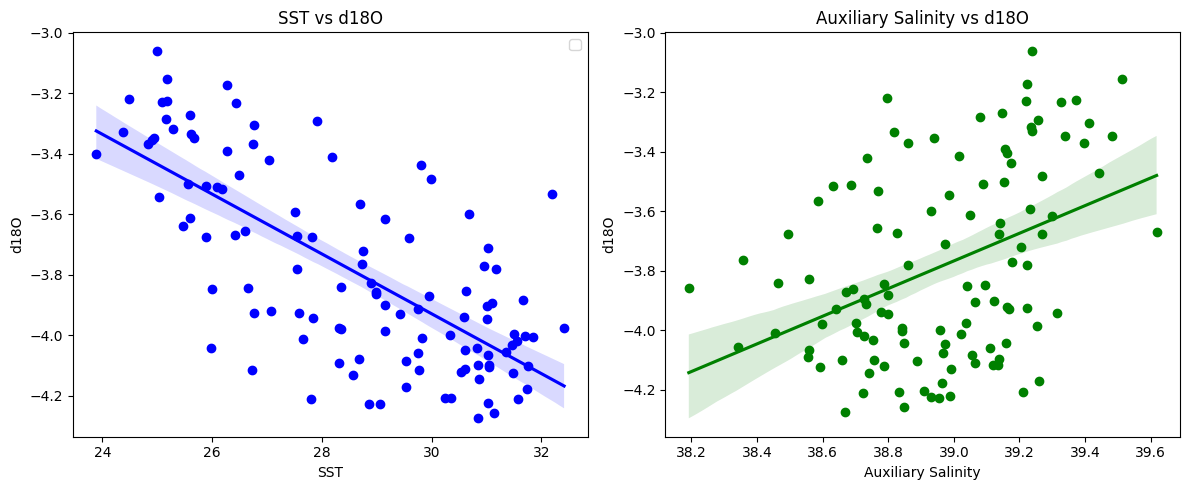

----------------------------------------------------------------------------------------------------


                            OLS Regression Results                            
Dep. Variable:                   d18O   R-squared:                       0.505
Model:                            OLS   Adj. R-squared:                  0.496
Method:                 Least Squares   F-statistic:                     56.62
Date:                Mon, 14 Jul 2025   Prob (F-statistic):           1.12e-17
Time:                        20:45:34   Log-Likelihood:                 9.3310
No. Observations:                 114   AIC:                            -12.66
Df Residuals:                     111   BIC:                            -4.453
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.7832      0.021   -178.772      0.0

/var/folders/8v/z7_lynrn24bbpwy6p36j3cwc0000gn/T/ipykernel_25044/4230309644.py:24: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axs[0].legend()


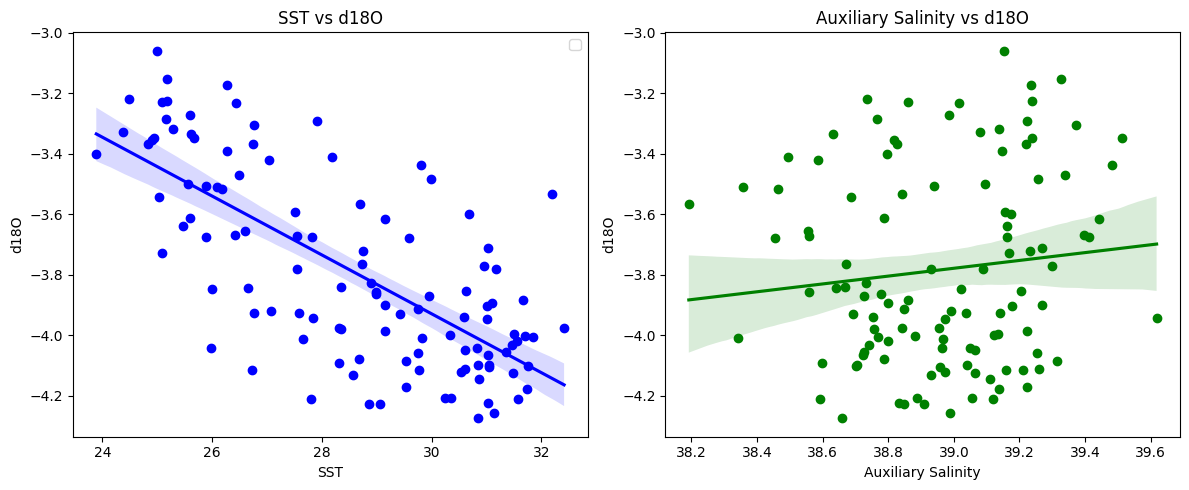

----------------------------------------------------------------------------------------------------


                            OLS Regression Results                            
Dep. Variable:                   d18O   R-squared:                       0.504
Model:                            OLS   Adj. R-squared:                  0.495
Method:                 Least Squares   F-statistic:                     56.92
Date:                Mon, 14 Jul 2025   Prob (F-statistic):           8.79e-18
Time:                        20:45:34   Log-Likelihood:                 9.5001
No. Observations:                 115   AIC:                            -13.00
Df Residuals:                     112   BIC:                            -4.765
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.7810      0.021   -179.610      0.0

/var/folders/8v/z7_lynrn24bbpwy6p36j3cwc0000gn/T/ipykernel_25044/4230309644.py:24: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axs[0].legend()


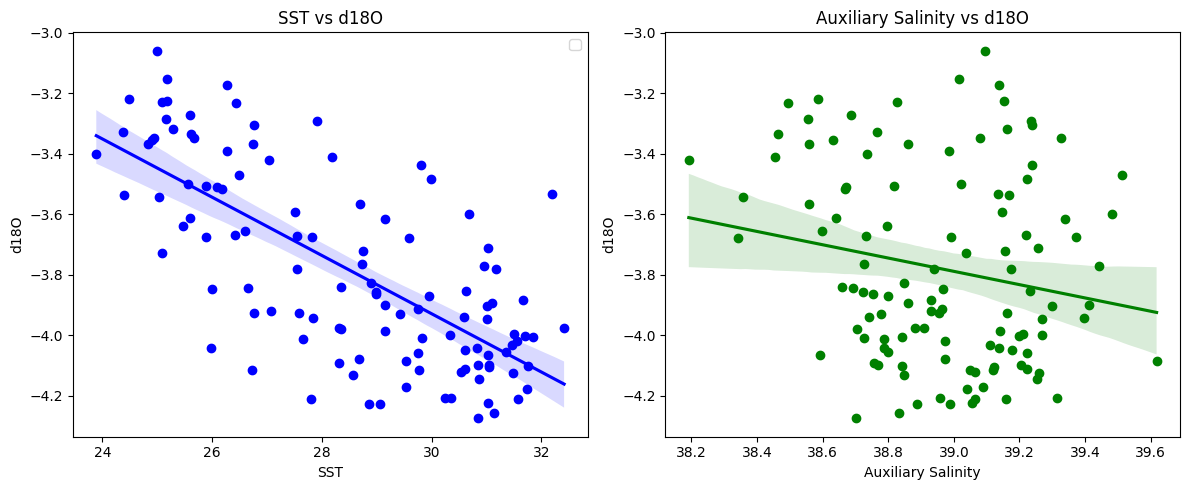

----------------------------------------------------------------------------------------------------


                            OLS Regression Results                            
Dep. Variable:                   d18O   R-squared:                       0.504
Model:                            OLS   Adj. R-squared:                  0.495
Method:                 Least Squares   F-statistic:                     56.86
Date:                Mon, 14 Jul 2025   Prob (F-statistic):           9.05e-18
Time:                        20:45:34   Log-Likelihood:                 9.4710
No. Observations:                 115   AIC:                            -12.94
Df Residuals:                     112   BIC:                            -4.707
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.7810      0.021   -179.564      0.0

/var/folders/8v/z7_lynrn24bbpwy6p36j3cwc0000gn/T/ipykernel_25044/4230309644.py:24: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axs[0].legend()


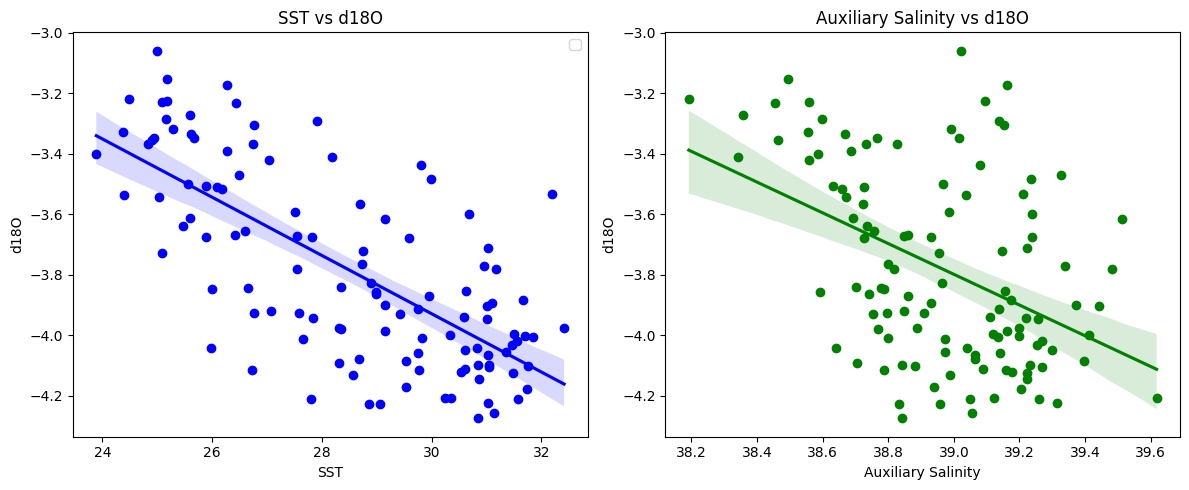

----------------------------------------------------------------------------------------------------


/var/folders/8v/z7_lynrn24bbpwy6p36j3cwc0000gn/T/ipykernel_25044/4230309644.py:24: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axs[0].legend()


                            OLS Regression Results                            
Dep. Variable:                   d18O   R-squared:                       0.505
Model:                            OLS   Adj. R-squared:                  0.496
Method:                 Least Squares   F-statistic:                     57.12
Date:                Mon, 14 Jul 2025   Prob (F-statistic):           7.93e-18
Time:                        20:45:34   Log-Likelihood:                 9.6057
No. Observations:                 115   AIC:                            -13.21
Df Residuals:                     112   BIC:                            -4.977
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.7810      0.021   -179.775      0.0

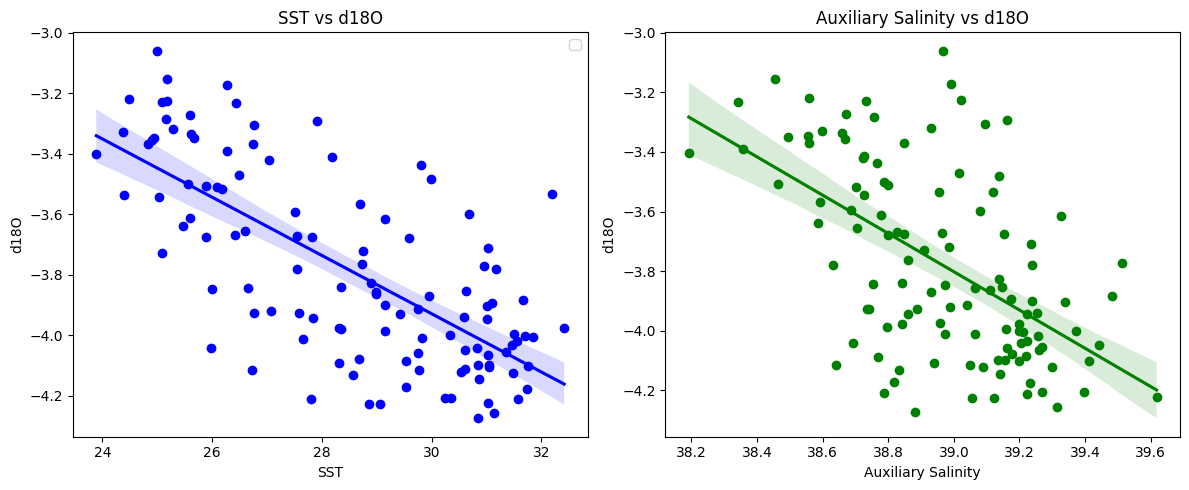

----------------------------------------------------------------------------------------------------


                            OLS Regression Results                            
Dep. Variable:                   d18O   R-squared:                       0.513
Model:                            OLS   Adj. R-squared:                  0.505
Method:                 Least Squares   F-statistic:                     59.04
Date:                Mon, 14 Jul 2025   Prob (F-statistic):           3.09e-18
Time:                        20:45:35   Log-Likelihood:                 10.574
No. Observations:                 115   AIC:                            -15.15
Df Residuals:                     112   BIC:                            -6.912
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.7810      0.021   -181.294      0.0

/var/folders/8v/z7_lynrn24bbpwy6p36j3cwc0000gn/T/ipykernel_25044/4230309644.py:24: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axs[0].legend()


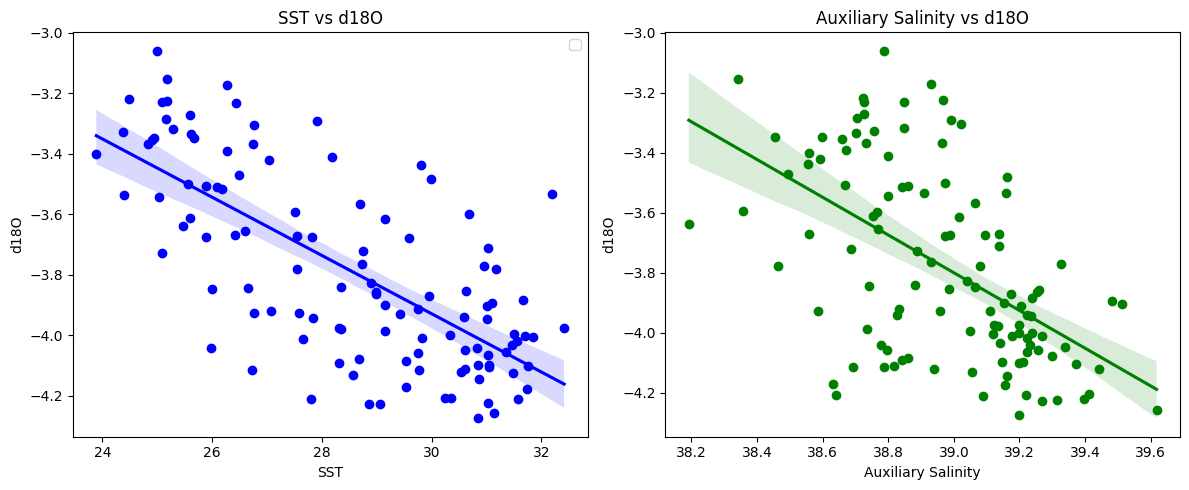

----------------------------------------------------------------------------------------------------


                            OLS Regression Results                            
Dep. Variable:                   d18O   R-squared:                       0.518
Model:                            OLS   Adj. R-squared:                  0.510
Method:                 Least Squares   F-statistic:                     60.29
Date:                Mon, 14 Jul 2025   Prob (F-statistic):           1.69e-18
Time:                        20:45:35   Log-Likelihood:                 11.195
No. Observations:                 115   AIC:                            -16.39
Df Residuals:                     112   BIC:                            -8.155
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.7810      0.021   -182.277      0.0

/var/folders/8v/z7_lynrn24bbpwy6p36j3cwc0000gn/T/ipykernel_25044/4230309644.py:24: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axs[0].legend()


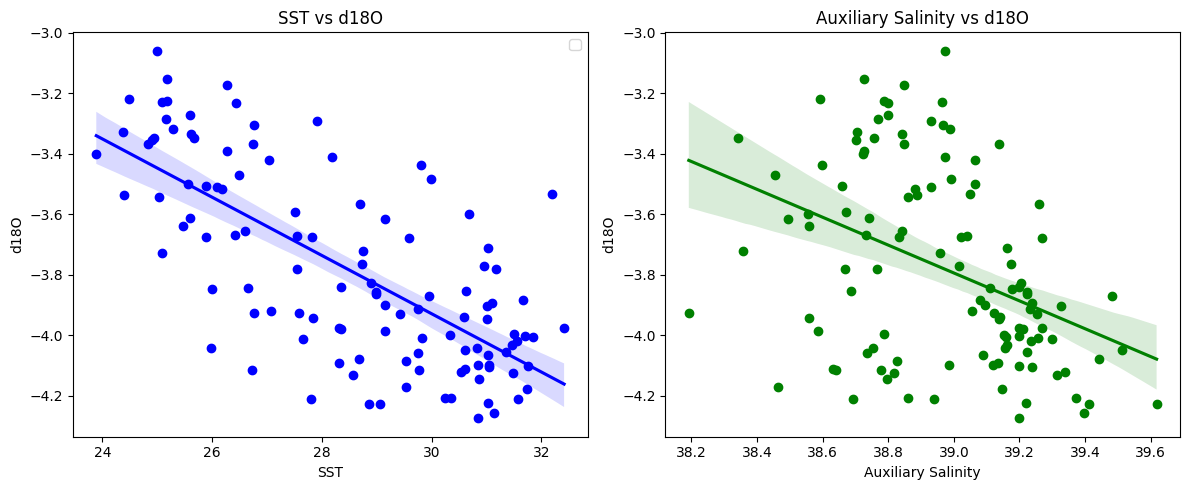

In [6]:
from IPython.display import display, HTML

# Multiple Linear Regression with lagged auxiliary salinity
for i in range(-4, 5):
    if i == 0:
        df_lagged = df
    else:
        df_lagged = dataframes[i]
    print('-' * 100)
    display(HTML(f'<span style="font-size:20px; font-weight:bold;">Regression with lagged auxiliary salinity {i} months:</span>'))
    X = df_lagged[['sst', 'aux_salinity']]
    y = df_lagged['d18O']
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    X_scaled = sm.add_constant(X_scaled)
    model = sm.OLS(y, X_scaled).fit()
    print(model.summary())

    # Visualize
    fig, axs = plt.subplots(1, 2, figsize=(12, 5))

    axs[0].scatter(df_lagged['sst'], df_lagged['d18O'], color='blue')
    sns.regplot(x='sst', y='d18O', data=df_lagged, scatter=False, ax=axs[0], color='blue', line_kws={'label': 'Best Fit Line'})
    axs[0].legend()
    axs[0].set_title("SST vs d18O")
    axs[0].set_xlabel("SST")
    axs[0].set_ylabel("d18O")

    axs[1].scatter(df_lagged['aux_salinity'], df_lagged['d18O'], color='green')
    sns.regplot(x='aux_salinity', y='d18O', data=df_lagged, scatter=False, ax=axs[1], color='green', line_kws={'label': 'Best Fit Line'})
    axs[1].set_title("Auxiliary Salinity vs d18O")
    axs[1].set_xlabel("Auxiliary Salinity")
    axs[1].set_ylabel("d18O")

    plt.tight_layout()
    plt.show()